<br>

## __Exercício: Detecção de Anomalias__

<br>

__1:__

Utilizando a classe DetectorAnomalias criada ao longo do módulo, __vamos avaliar um detector de anomalias.__

O dataset utilizado pode ser importado através da função getData. 

Nesse conjunto de dados, possuímos 6 variáveis explicativas, $X_1, .., X_6$ e uma variável com a marcação se a instância é uma anomalia ou não.

Utilizando a __metodolodia__ discutida ao longo do módulo, __teste diferentes modelos (variando o limiar $\epsilon$)__ a fim de encontrar o que __melhor fita os dados.__

Justifique as escolhas do $\epsilon$, bem como quais as métricas de performance abordadas. 

<br>

__2:__ 

Aborde o problema num contexto de aprendizado supervisionado, ou seja, treine modelos de classificação binária com o objetivo de detectar anomalias.

Compare os resultados entre as metodologias.

In [226]:
import pandas as pd 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Modelo não Supervisionado

In [227]:
def getData():
    return pd.read_csv("dataframe_anomalias_exercicio.csv")

In [228]:
df = getData()
df.head()

,x1,x2,x3,x4,x5,x6,anomalia
0,7.731153,23.299155,-0.367453,4.715372,9.306179,16.780965,0.0
1,11.466833,16.943695,-0.245131,7.060311,10.462826,19.821289,0.0
2,11.501272,20.196011,1.206049,-4.957189,7.771262,19.100079,0.0
3,10.893921,16.072385,2.738045,-3.684228,7.373334,23.225524,0.0
4,10.091706,19.253894,0.996895,-9.504052,8.883988,17.903298,0.0


In [229]:
df.anomalia.value_counts()

0.0    10046
1.0       54
Name: anomalia, dtype: int64

x1


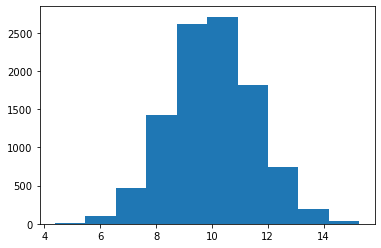

x2


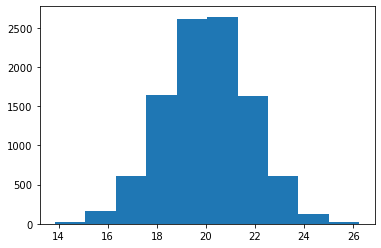

x3


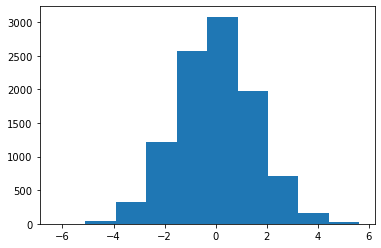

x4


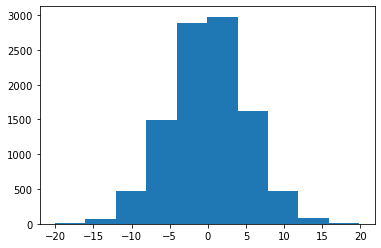

x5


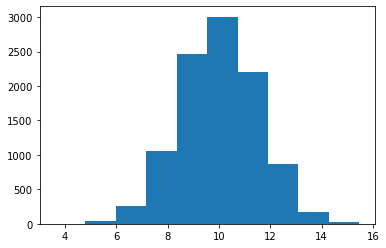

x6


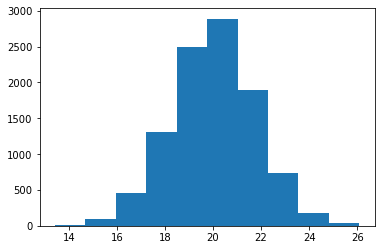

anomalia


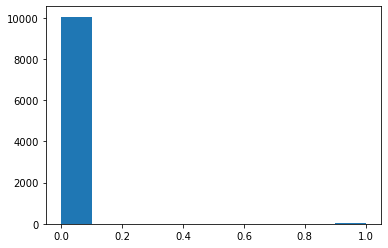

In [230]:
for x in df:
    print(x)
    plt.hist(df[x])
    plt.show()

#### Observando o histograma das variaveis do conjunto de dados, observa-se que o comportamento tende a uma distribuição normal, exceto a "target", sendo assim vou plotar um gráfico que permite observar como as variaveis se comportam.

#### A fim de verificar como os dados se comportam vou analisar as relações bidimensionais dos dados

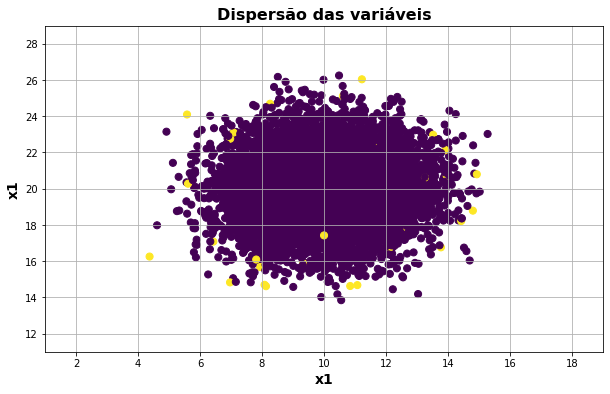

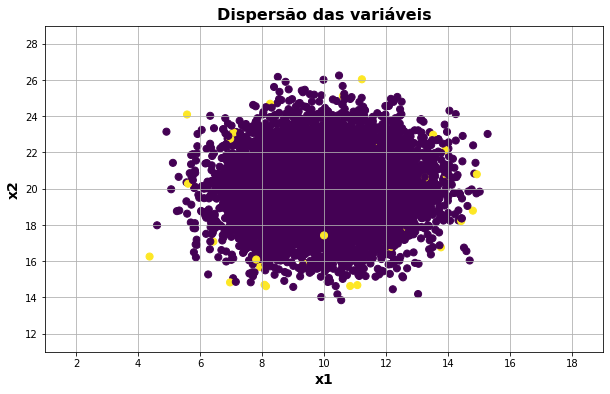

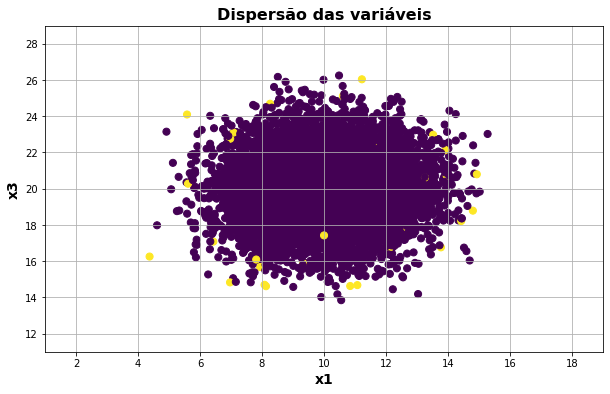

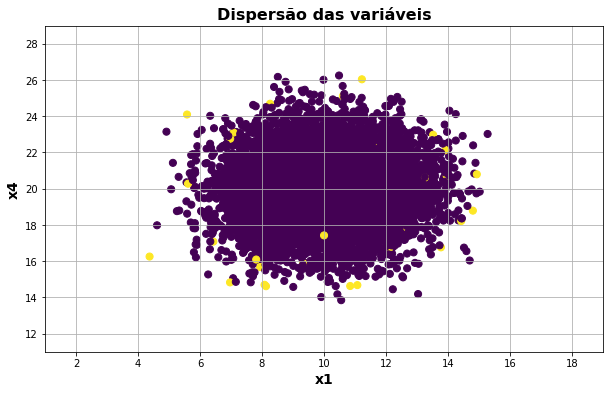

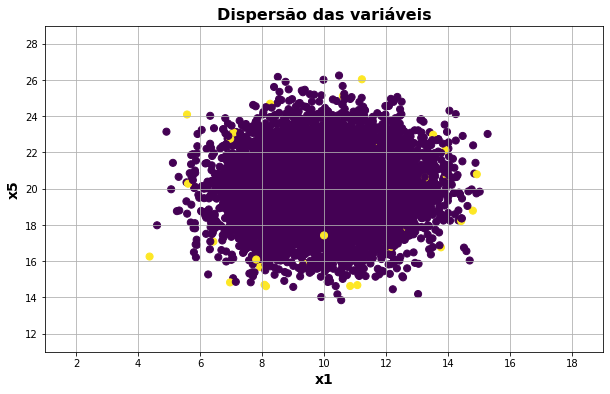

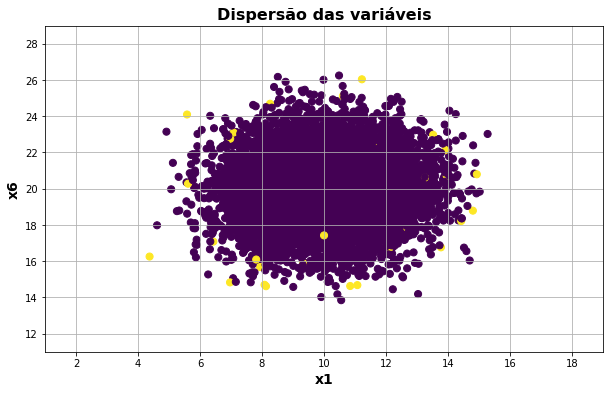

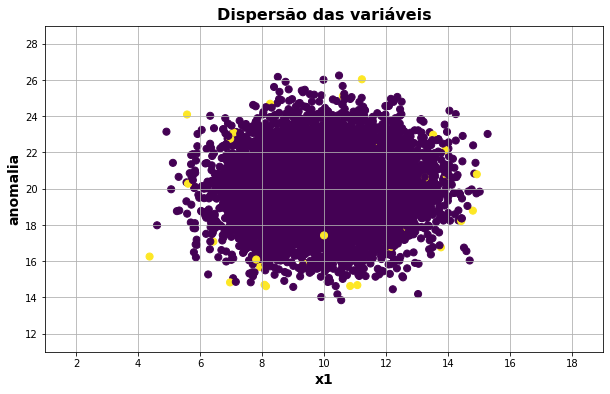

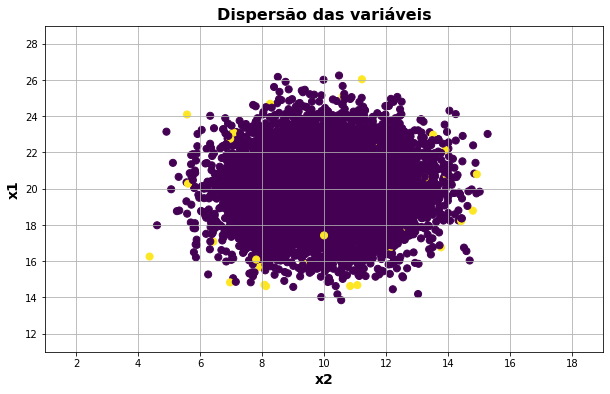

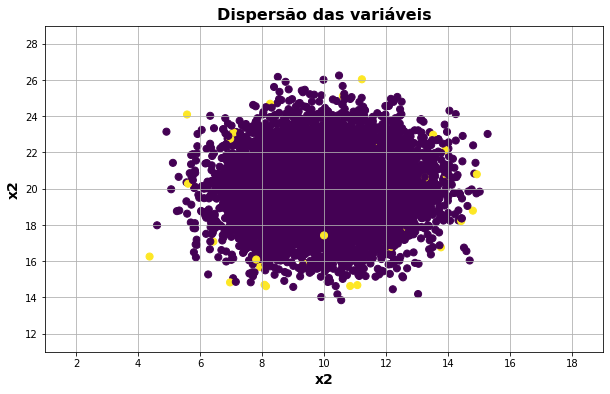

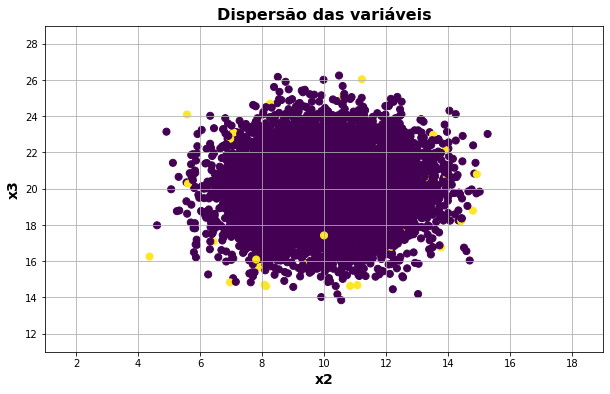

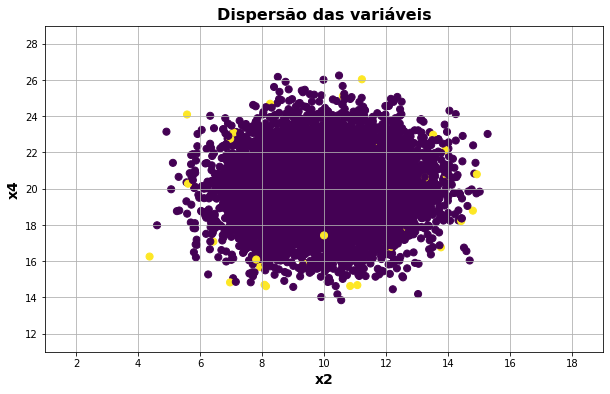

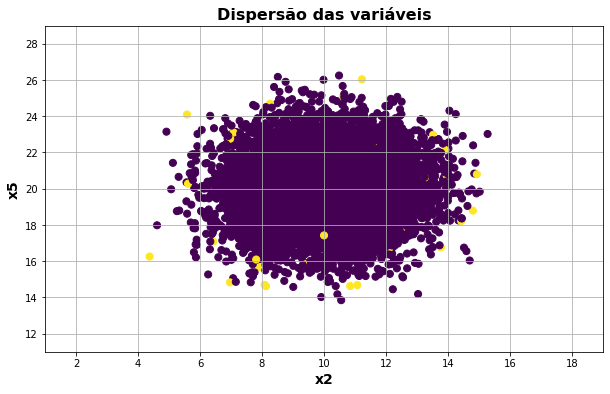

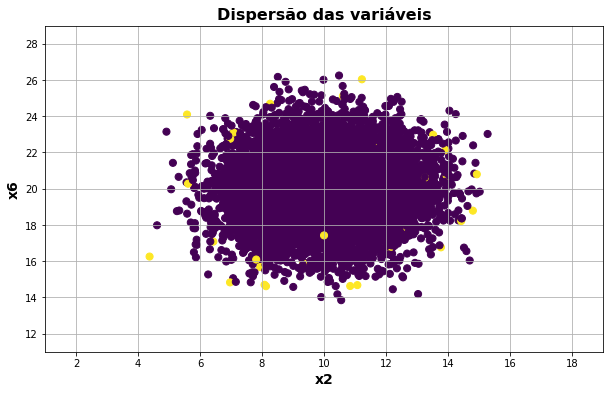

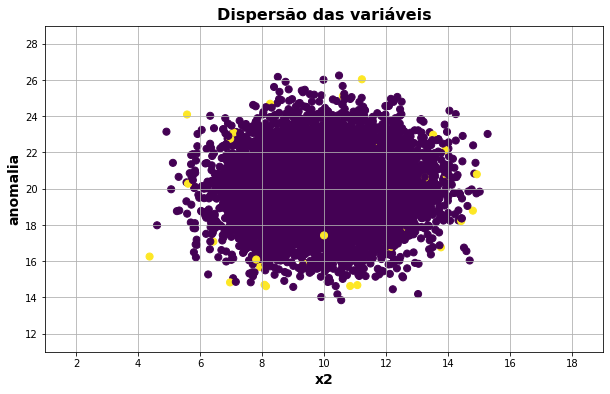

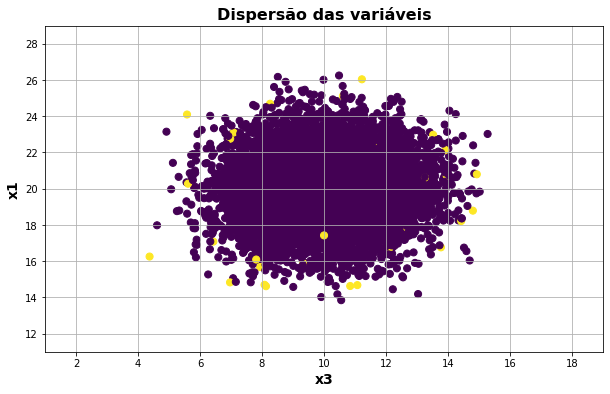

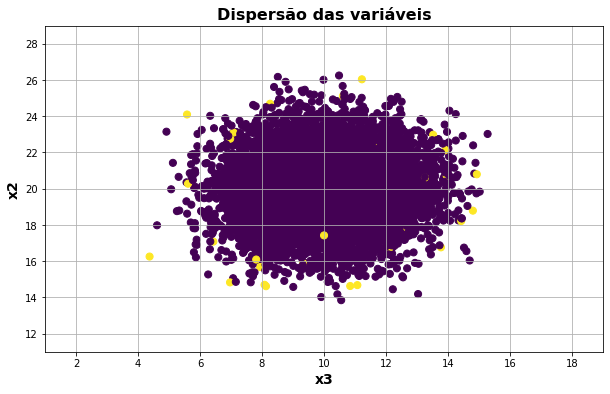

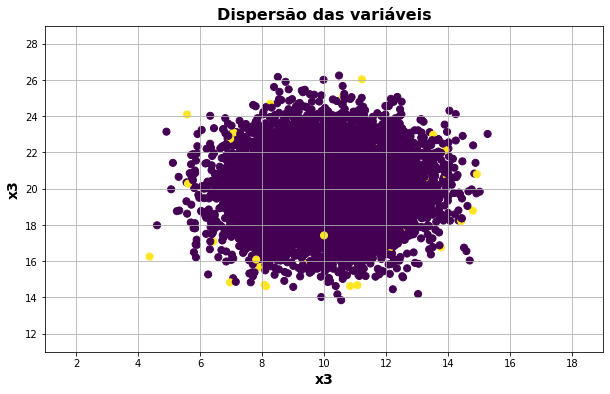

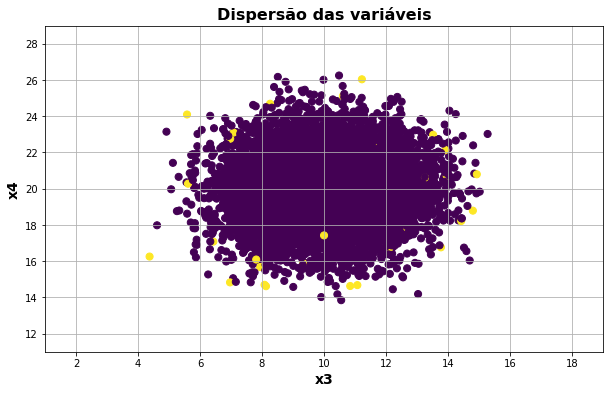

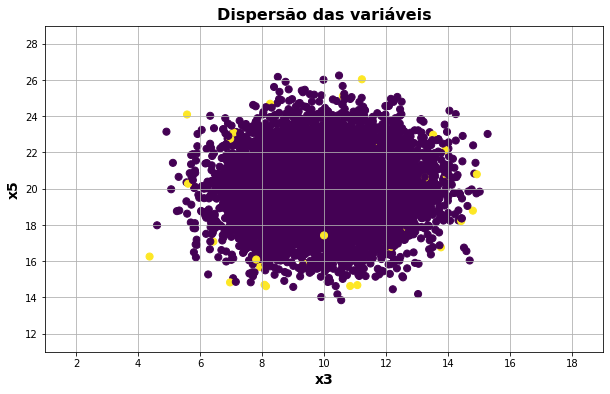

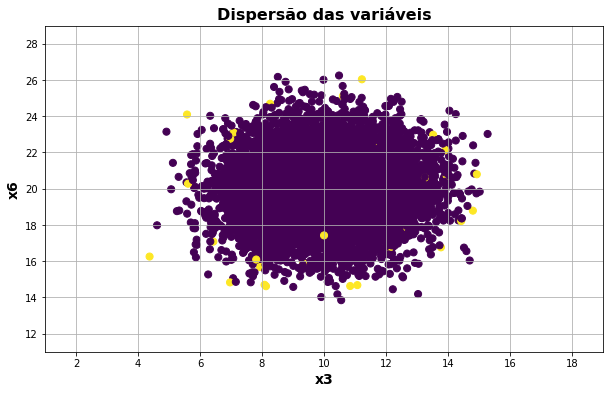

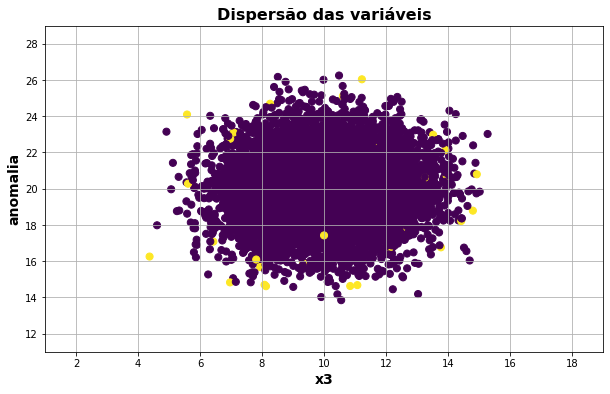

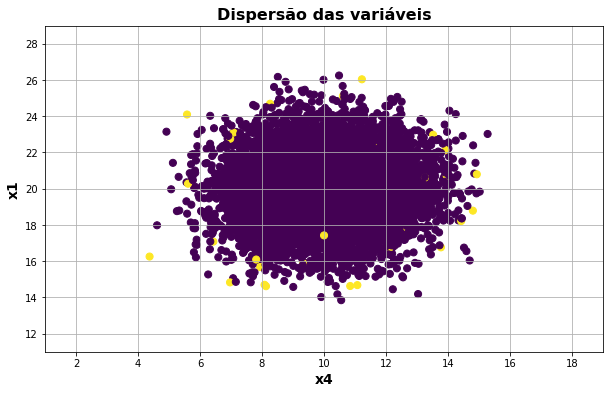

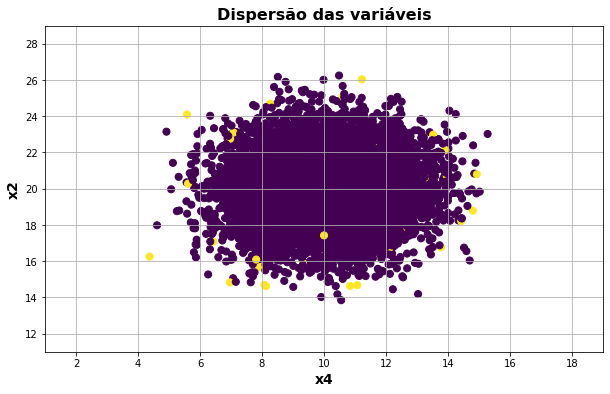

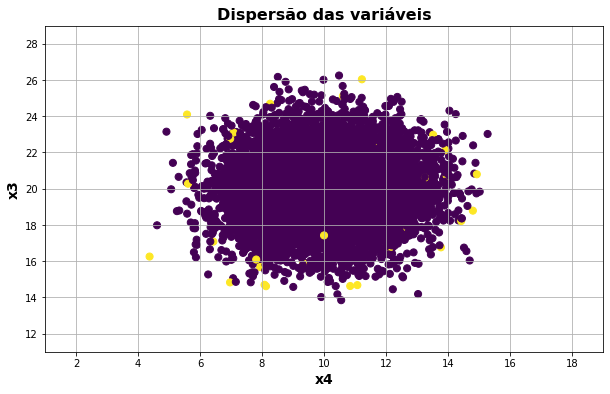

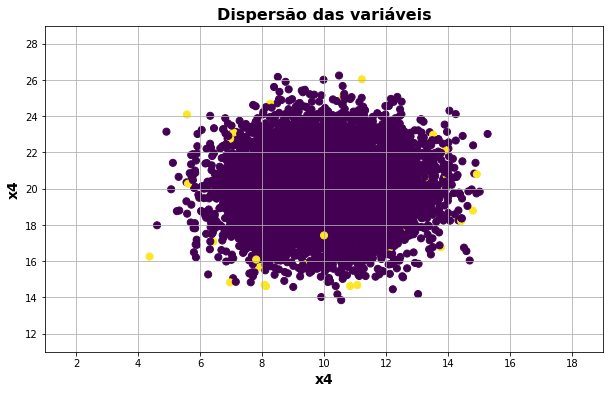

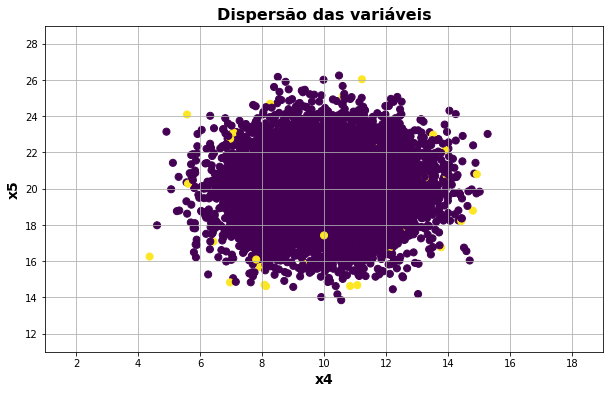

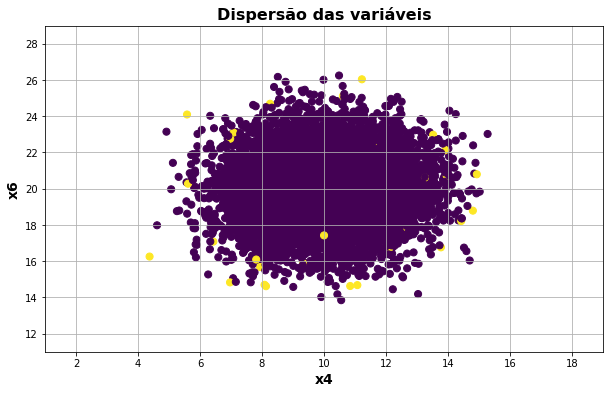

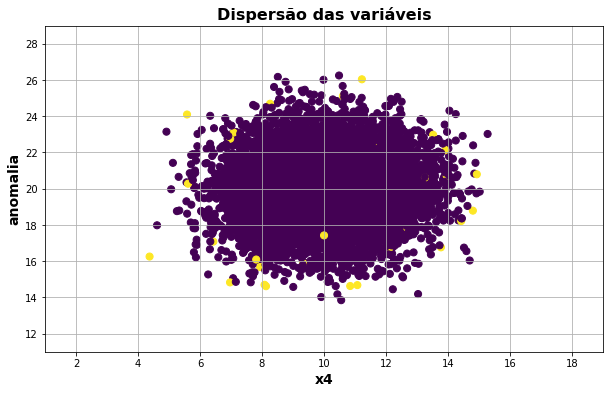

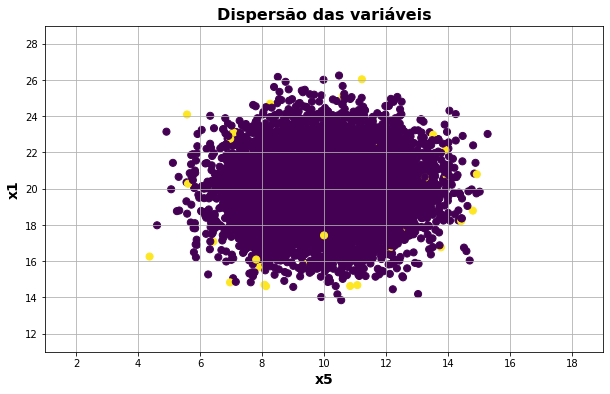

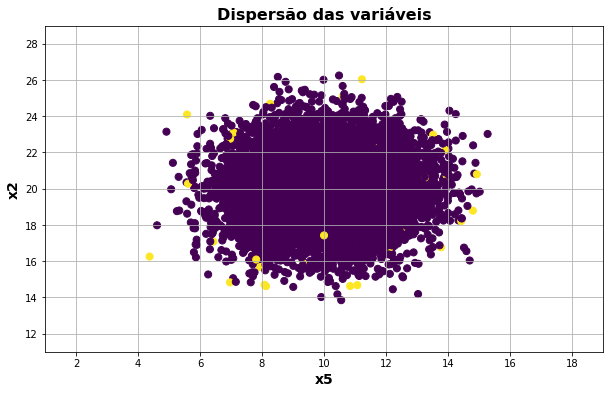

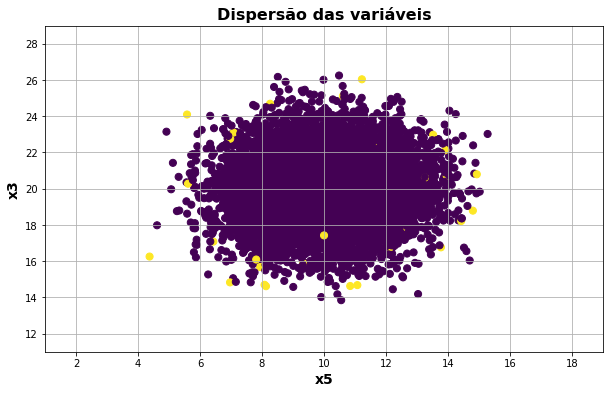

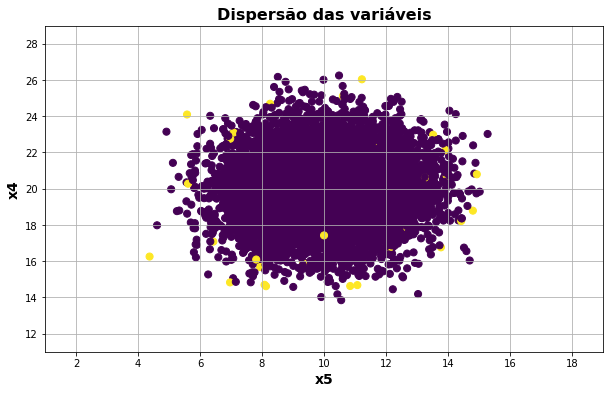

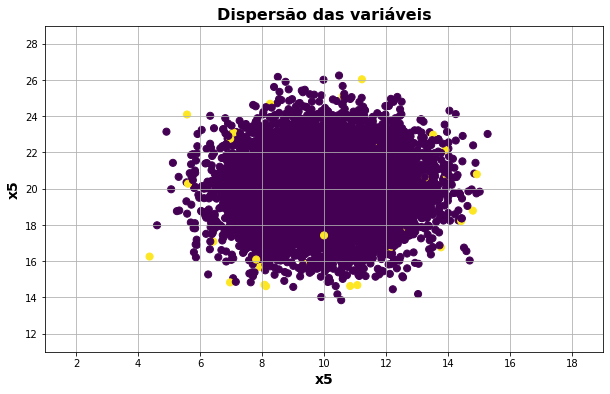

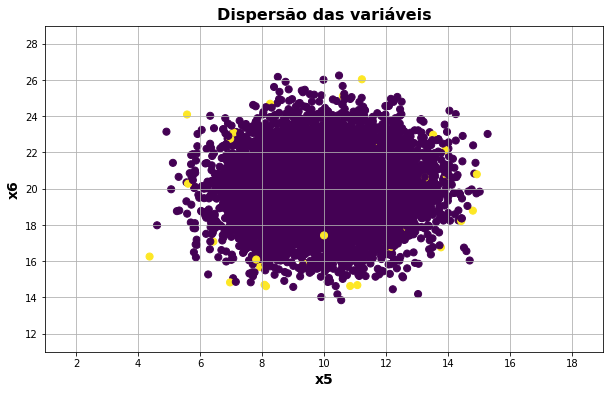

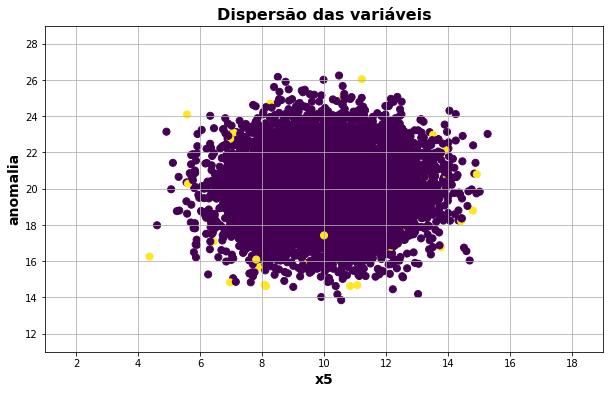

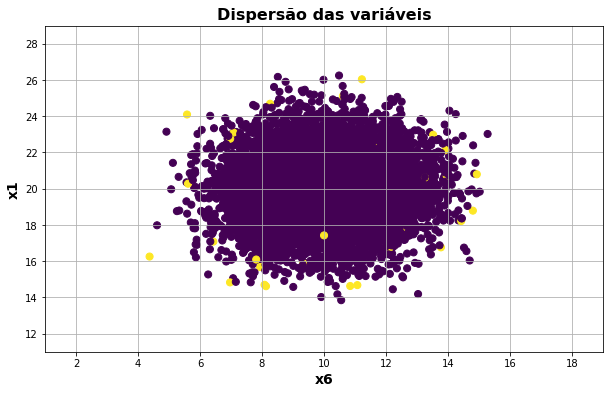

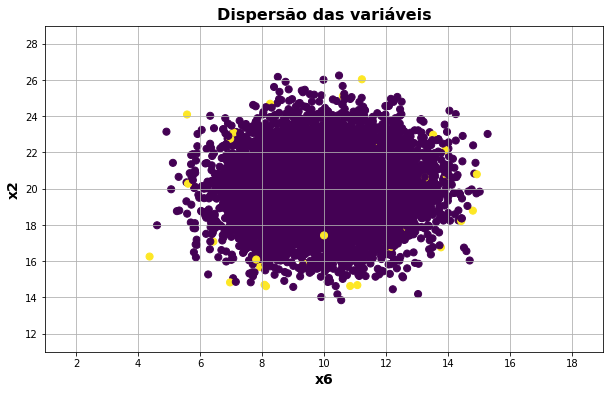

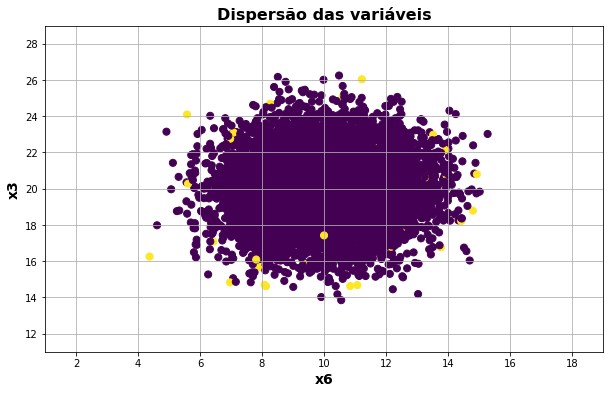

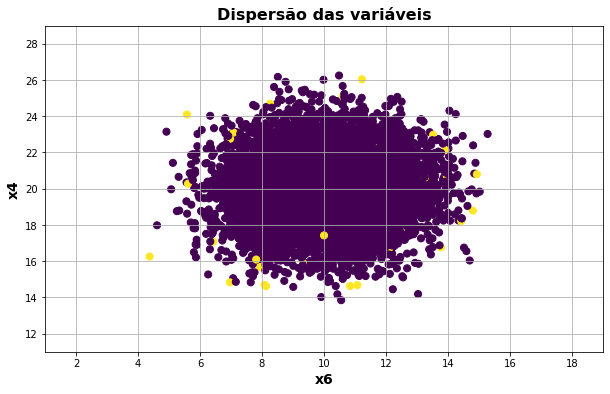

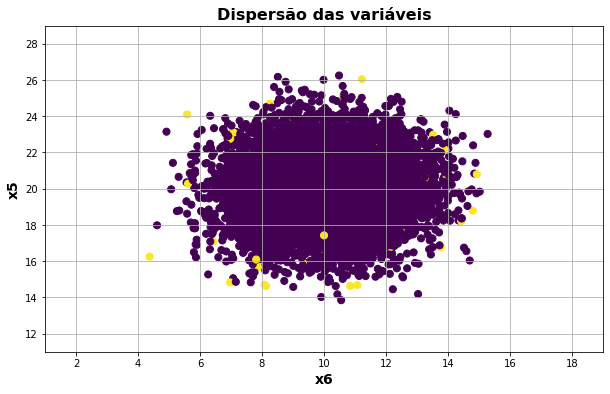

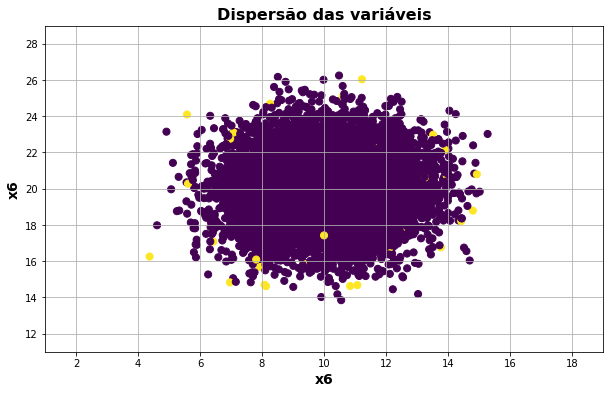

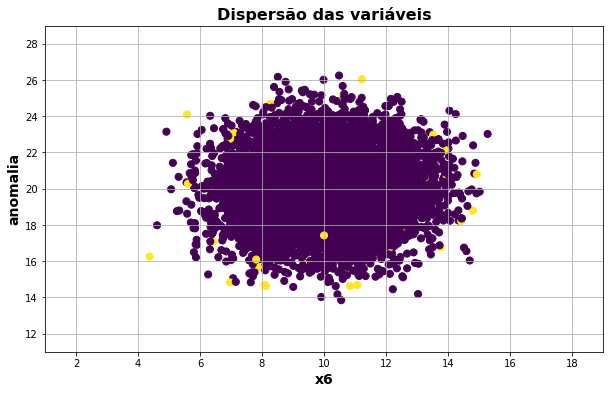

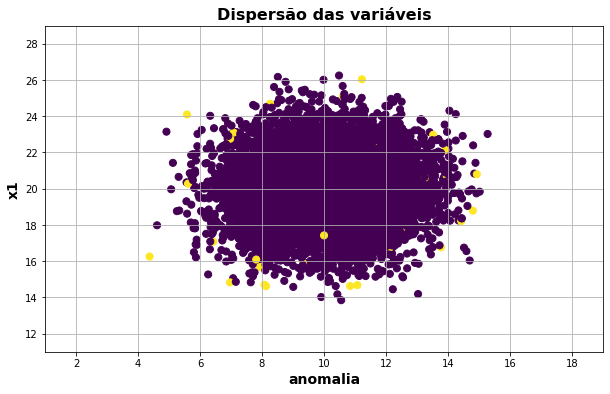

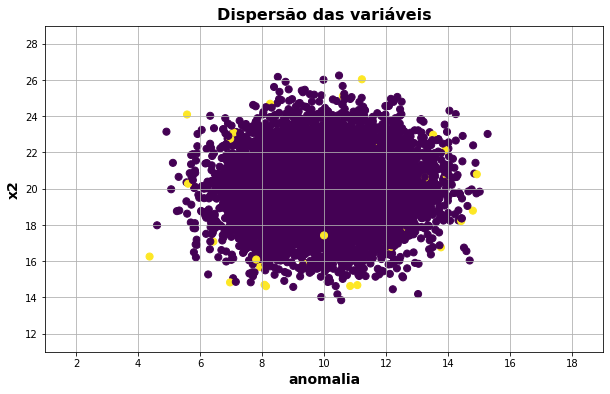

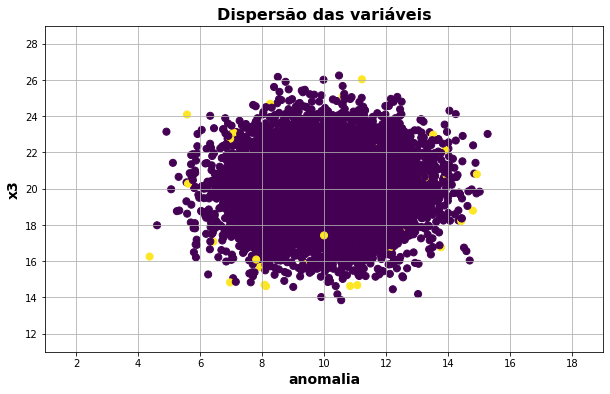

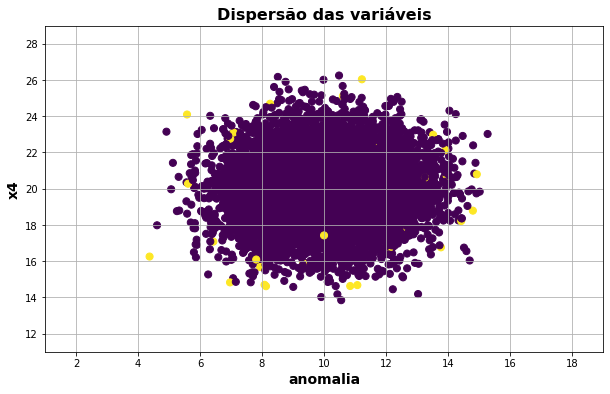

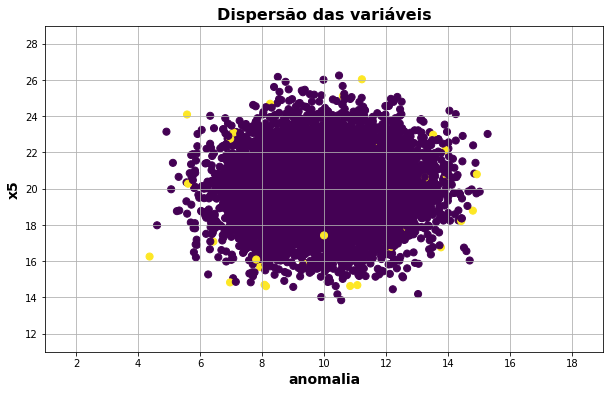

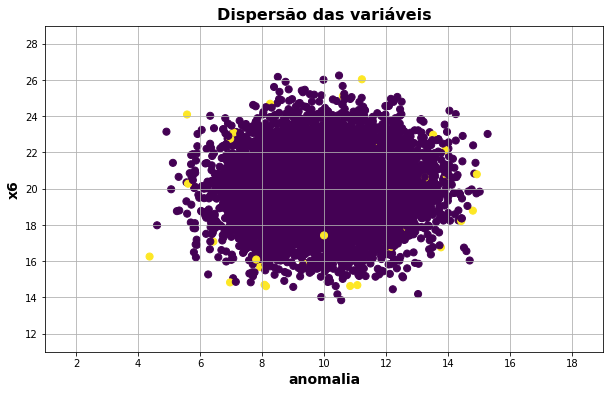

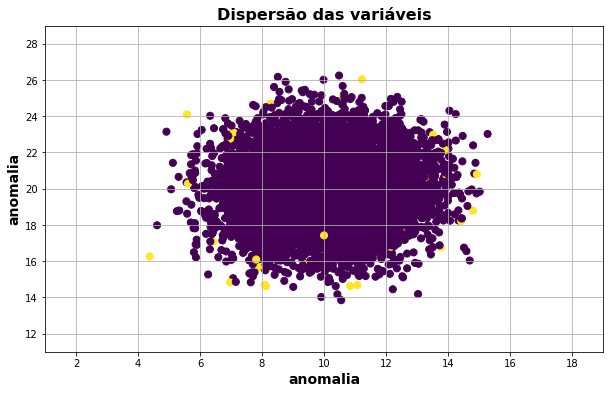

In [231]:
colors = df.anomalia
for x in df:
    for y in df:
        plt.figure(figsize=[10,6])
        plt.title("Dispersão das variáveis",fontsize = 16, fontweight = 'bold')
        plt.xlabel(x,fontsize = 14, fontweight = 'bold')
        plt.ylabel(y,fontsize = 14, fontweight = 'bold')
        plt.scatter(df.x1, df.x2, s = 50, c=colors)
        plt.xlim([1,19])
        plt.ylim([11,29])
        plt.grid()
        plt.show()

- Conforme demonstra o plot acima, é necessário tentar entender o comportamento das anomalias
- Visivilmente a medida que observamos as variaveis um grid seria dificil de padronizar o conjunto de dados.

In [12]:
df['media'] = (df.x1 + df.x2 + df.x3 + df.x4 + df.x5 + df.x6) / 6
df['desvio'] = np.sqrt((df.media + df.x1)**2 + (df.media + df.x2)**2 + (df.media + df.x3)**2 + (df.media + df.x4)**2 + (df.media + df.x5)**2+ (df.media + df.x6)**2 /6)
df.head()

,x1,x2,x3,x4,x5,x6,anomalia,media,desvio
0,7.731153,23.299155,-0.367453,4.715372,9.306179,16.780965,0.0,10.244228,47.681846
1,11.466833,16.943695,-0.245131,7.060311,10.462826,19.821289,0.0,10.918304,48.261499
2,11.501272,20.196011,1.206049,-4.957189,7.771262,19.100079,0.0,9.136247,42.772207
3,10.893921,16.072385,2.738045,-3.684228,7.373334,23.225524,0.0,9.436497,41.300226
4,10.091706,19.253894,0.996895,-9.504052,8.883988,17.903298,0.0,7.937622,39.255232


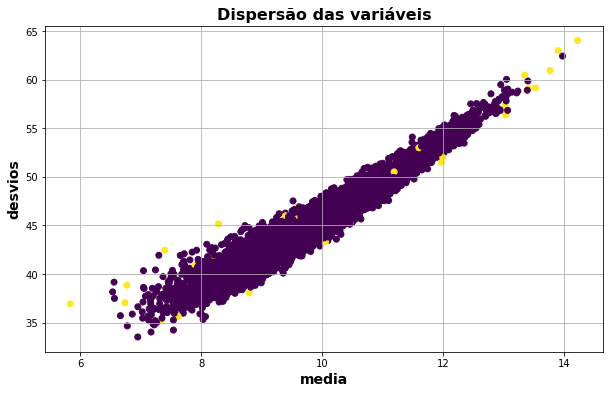

In [15]:
plt.figure(figsize=[10,6])
plt.title("Dispersão das variáveis",fontsize = 16, fontweight = 'bold')
plt.xlabel("media",fontsize = 14, fontweight = 'bold')
plt.ylabel("desvios",fontsize = 14, fontweight = 'bold')
plt.scatter(df.media, df.desvio, c=colors)
plt.grid()
plt.show()

- No plot acima, plotei a media das 6 variaveis do df, e fiz o desvio padrão do mesmo a fim de encontrar um padrão nos dados, 
mas sem sucesso

#### Divisão dos dados

- Vou construir uma função que divide o dataset em treino, validação e teste, seguindo alguns padrões:
    - 50 por cento para treino, e o df_treino deve estar sem anomalias
    - 25 por cento para validação, e 27 anomalias
    - 25 por cento para teste, e 27 anomalias

In [232]:
# Immportando do skit_learn a  função train_test_split para dividir os dados
from sklearn.model_selection import train_test_split

In [233]:
# Primeiro vou ordenar os dados do menor para o menor
df.sort_values(by = ['anomalia'],ascending = True, inplace = True)

# O parametro shuffle como false, divide o dataset sem aleatoriedade, permitindo que podemos pegar os dados sem anomalias
df_train, df_test = train_test_split(df, test_size=0.5, random_state=0, shuffle = False)

In [234]:
df_train['anomalia'].value_counts()

0.0    5050
Name: anomalia, dtype: int64

In [235]:
df_test['Indice'] = np.arange(5050) # Inserindo um indice para ter uma referencia dos dados

anomalias = df_test[df_test['anomalia']==1] # Separando o dado em anomalia e restante
restante = df_test[df_test['anomalia']==0]

In [236]:
# Dividindo os dados
dfval, dftest = train_test_split(anomalias, test_size=0.5, random_state=0, shuffle = False)
df_val, df_test = train_test_split(restante, test_size=0.5, random_state=0, shuffle = False)

In [237]:
df_val_ = pd.concat([dfval, df_val], axis = 0)
df_test_ = pd.concat([dftest, df_test], axis = 0)

In [238]:
print(df_train.shape, df_val_.shape, df_test_.shape)

(5050, 7) (2525, 8) (2525, 8)


In [239]:
# Conferindo se os dados estão corretamente divididos
print(df_val_['anomalia'].value_counts())
print(df_test_['anomalia'].value_counts())

0.0    2498
1.0      27
Name: anomalia, dtype: int64
0.0    2498
1.0      27
Name: anomalia, dtype: int64


#### Detecção de Anomalias

In [240]:
class DetectorAnomalias():
    
    def __init__(self, epsilon):
        self.epsilon = epsilon
        
    def fit(self, X):
        medias = X.mean(axis = 0)
        desvios = X.std(axis = 0)
        gaussianas = [st.norm(loc = m, scale = d) for m, d in zip(medias, desvios)]  
        self.gaussianas = gaussianas
        self.X = X
        
    def prob(self, x):
        p = 1
        for i in range(self.X.shape[1]):
            gaussiana_i = self.gaussianas[i]
            x_i = x[i]
            p *= gaussiana_i.pdf(x_i)
        return p
    
    def isAnomaly(self, x):
        return int(np.where(self.prob(x) < self.epsilon, 1, 0))

In [241]:
X = df_train.values

In [242]:
#instanciando o algoritmo
ann = DetectorAnomalias(epsilon = 0.001)
ann.fit(X)

In [243]:
# Usando a primeira linha para teste
x = X[0, ]
x

array([ 7.73115287, 23.29915461, -0.36745342,  4.71537151,  9.30617937,
       16.78096518,  0.        ])

In [244]:
# não é anomalia, conforme esperamos(df já dividido)
ann.isAnomaly(x)

C:\Users\gilma\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0

In [29]:
# Com o objetivo de realizar uma distribuição normal dos dados de treino, vou pegar a media das variaveis e o desvio
# padrão dos mesmos

media_ = df_train.mean().mean()

desvio_ = df_train.std().std()

In [30]:
def distr_gaussiana(x, media, desvio_padrao):
    return (1 / (desvio_padrao * np.sqrt(2 * np.pi))) * np.exp( (-0.5) * ((x - media)/desvio_padrao)**2 )

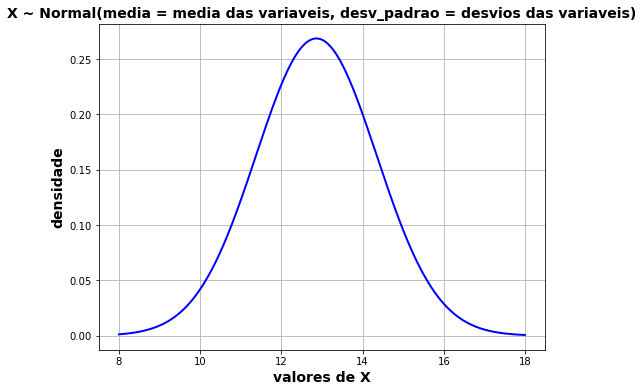

In [33]:
# Gráfico com as distribuição normal dos dados
media = media_
desvio_padrao = desvio_

xlims = np.arange(8,18,0.01)
distr_gaus = [distr_gaussiana(x, media, desvio_padrao) for x in xlims]

plt.figure(figsize=[8,6])
plt.plot(xlims, distr_gaus, lw = 2, c = 'blue')
plt.xlabel("valores de X",fontsize = 14, fontweight = 'bold')
plt.ylabel("densidade",fontsize = 14, fontweight = 'bold')
plt.title("X ~ Normal(media = media das variaveis, desv_padrao = desvios das variaveis)",fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

In [ ]:
sns.pairplot(df,hue='anomalia',palette='bwr')

- Neste gráfico consigo observar que o padrão dos dados com análises bidimensionais demostra:
    - que há uma concentração de dados, indicando que existe a possibilidade de criar um bom modelo.
    - anomalias são mais frequentes nas extremidades dos dados.
    - no curso aprendemos que não é viável estimar anomalias como parte do dataset de treino, mas neste sentido serve para visualização.
    - Podemos observar que alguns pontos são mais faceis de detectar, visto que estão fora da concentração de dados, porém outros dados estão mais agrupados ao restante dos demais dados.

## Modelo Supervisionado

- Aborde o problema num contexto de aprendizado supervisionado, ou seja, treine modelos de classificação binária com o objetivo de detectar anomalias.

- Ao fit ar o modelo somente com o df de treino, o "y" é necessário ter os dois valores, sendo assim vou unir o dataset de treino e validação

In [64]:
#df.drop(columns=['media','desvio'], inplace = True)

In [91]:
df.reset_index()

X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = df[['anomalia']]

In [92]:
from  sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(7575, 6) (2525, 6) (7575, 1) (2525, 1)


In [93]:
#Importando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [94]:
# Instanciando e treinando o modelo
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

C:\Users\gilma\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [95]:
# Coeficientes
print(logreg.intercept_)
print(logreg.coef_)

[-11.79345316]
[[ 0.14278259  0.01531382  0.35549629  0.05910125 -0.09332988  0.26962163]]


In [96]:
# Realizando a acuracia 
from sklearn.metrics import accuracy_score

accuracy_score(y_true = ytrain, y_pred = logreg.predict
               (Xtrain))

0.9948514851485148

- A acurácia do modelo foi muito alta, porém a acurácia só opta pela classe possitiva e como nosso dataset possui muitos valores positivos, então a metrica não é precisa neste contexto

In [97]:
# Matriz de confusão teve uma boa performance
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))

array([[7536,    0],
       [  39,    0]], dtype=int64)

In [124]:
ytrain[ytrain['anomalia']==1].count()

anomalia    39
dtype: int64

In [98]:
print("LogReg:")
print('Recall: ', recall_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('Precison: ', precision_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('F1 Score - reg. logística: ', f1_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))

LogReg:
Recall:  0.0
Precison:  0.0
F1 Score - reg. logística:  0.0


C:\Users\gilma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- metricas com resultantos insignificantes

In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = ytest, y_pred = logreg.predict(Xtest))

array([[2510,    0],
       [  15,    0]], dtype=int64)

In [123]:
ytest[ytest['anomalia']==1].count()

anomalia    15
dtype: int64

- No caso de modelos supervisionados, os dados demonstram que a classe possitiva é pouco representativa e não consegue estimar com precisão, o algoritmo criado tem comportamento ingenuo e não possibilitando a generalização dos dados.

- Porém na matriz de confusão os dados de teste teve bom resultado.